# Обработка данных

In [ ]:
!pip install razdel transformers -q

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import torch
import pandas as pd
import razdel
import re
import random
import json
from tqdm.auto import tqdm, trange

## Невыравненные тексты

In [ ]:
ENGLISH_WORDS = re.compile(r'\b[a-zA-Z]+\b')
URLS = re.compile(r'https?://\S+|www\.\S+')
EMAILS = re.compile(r'\S+@\S+')
PHONES = re.compile(r'(\+?\d[\d\s\-()]{6,})')
BRACKETS = re.compile(r'\[[^\]]*\]|\([^\)]*\)')
JUNK = re.compile(r'[~*^%$@#_=<>\\|]')

def clean_text(text):
    text = URLS.sub('', text)
    text = EMAILS.sub('', text)
    text = PHONES.sub('', text)
    text = BRACKETS.sub('', text)
    text = ENGLISH_WORDS.sub('', text)
    text = JUNK.sub('', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

In [ ]:
from razdel import sentenize

filtered_dir = '/content/drive/MyDrive/FilteredNivkhTxt'
n_txt_sents = []

for folder_name in tqdm(os.listdir(filtered_dir)):
    folder_path = os.path.join(filtered_dir, folder_name)
    if os.path.isdir(folder_path):
        for fname in ['n.txt', 'n_am.txt']:
            file_path = os.path.join(folder_path, fname)
            if os.path.isfile(file_path):
                with open(file_path, 'r', encoding='utf-8') as f:
                    text = f.read()
                for sent in sentenize(text):
                    cleaned = clean_text(sent.text)
                    if cleaned:
                        n_txt_sents.append(cleaned)

print(len(n_txt_sents))

  0%|          | 0/338 [00:00<?, ?it/s]

8041


In [ ]:
n_txt_sents = list(set(n_txt_sents))
print(len(n_txt_sents))

7834


In [ ]:
n_txt_sents

['Ты чуз литературная интерпритация наследие т’ылгу п’ӈара к’ымлыфку п’ылӻны яӻоло», – компания «Сахалин Энерджи» социальная деятельность ведущий специалист Юлия Завьялова итть.',
 'Ни ӿыйм умкун ӿаӈан!”» Янт ан, Курӈ маӈӷла Ызык р̌утлу ныйныкиф йивтла?',
 'лер Мивух, сык курӈ ӈалагур, самоизоляция режим ныдьғу.',
 'Ӿоӄат, олаӻа фит, ӈафӄ мут ӿумта.',
 'Тьый образованиеғе, кадровое обеспечениеғе пилкар блок йивдь.',
 'Нивхгу ӿутӽ тывғт, эзмут п’роӄодьғу.',
 'Ни лахку т’хых тьыӈ весӄарлат п’р̌ыкут, чыӈ эӄут идыныдьра».',
 'Ах ара ялӱ хава ха бы, чо энвэӱқтох чиӱк.',
 'Семинар п’ыхтоӽ п’р̌ыӈан, малӻола нивхгу Марина орботф амӽтадьғу, п’и йиймфку грантовый конкурскуух качество хитинын.',
 'Имғу т’аӻр̌ тоӻадь: Дмитрий Агнюн ӿара, Роман Ёргун ӿара, Максим Багрин ӿара сык ык т’ылфтоӽ тяр̌ӄдьғу.',
 'Лоӄр̌ т’оӻс кифкис эӷлӈ ӄоӈы, яӈаӽ ӿу киф тагд.',
 'Иф п’мивух панд тёмр̌ку, чӈыр̌ку опур̌ ӿадь.',
 'Тьый ни орбот нивхгудоӽ п’и ниғидь фурныдьра, имғу орботскир, кекискир, чуз предприятиеғу, тыфк

## Параллельные тексты

In [ ]:
input_dir = '/content/drive/MyDrive/translation_resplit3'
data = []

for filename in tqdm(os.listdir(input_dir)):
    if filename.endswith('.txt'):
        full_path = os.path.join(input_dir, filename)
        tag_match = re.search(r'_(\w+)\.txt$', filename)
        tag = tag_match.group(1) if tag_match else None
        with open(full_path, 'r', encoding='utf-8') as f:
            src, tgt = None, None
            for line in f:
                if re.match(r'^\d+>', line):
                    src = re.sub(r'^\d+>\s*', '', line).strip()
                elif re.match(r'^\d+=', line):
                    tgt = re.sub(r'^\d+=\s*', '', line).strip()
                    if src is not None:
                        data.append({
                            'nivkh': src,
                            'rus': tgt,
                            'file': filename,
                            'source': tag
                        })
                        src, tgt = None, None

df = pd.DataFrame(data)
df

  0%|          | 0/99 [00:00<?, ?it/s]

,nivkh,rus,file,source
0,Лаӄр̌.,Белка.,a185_tmn.txt,tmn
1,Ӄан лаӄр̌ ньр̌ыдь.,Собака белку увидела.,a185_tmn.txt,tmn
2,Лаӄр̌ ӄой сродь.,Белка на лиственницу забралась.,a185_tmn.txt,tmn
3,Ӄан ығдь.,Собака лает.,a185_tmn.txt,tmn
4,Ромкин лаӄр̌ амадь.,Ромкин на белку смотрит.,a185_tmn.txt,tmn
...,...,...,...,...
12123,Килгу йивдля?,Эвенки были?,11_shrsh.txt,shrsh
12124,"Келдох к’еспуртьғу, к’езотёстьғу.","Друг другу новости сообщают, спрашивают.",11_shrsh.txt,shrsh
12125,Ойӄра.,Грешно.,11_shrsh.txt,shrsh
12126,"Ойӄра, ойӄра, сидьвак фурдлю.","Грешно, грешно, всякое разное говорят.",11_shrsh.txt,shrsh


In [ ]:
df['nivkh_len'] = df['nivkh'].apply(lambda x: len(x.split()))
print(df['nivkh_len'].describe())

count    12128.000000
mean         4.213061
std          2.690970
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max         39.000000
Name: nivkh_len, dtype: float64


In [ ]:
df['nivkh_norm'] = df['nivkh'].str.lower().str.strip()
df['rus_norm'] = df['rus'].str.lower().str.strip()
df = df.drop_duplicates(subset=['nivkh_norm', 'rus_norm']).drop(columns=['nivkh_norm', 'rus_norm']).reset_index(drop=True)
df

,nivkh,rus,file,source,nivkh_len
0,Лаӄр̌.,Белка.,a185_tmn.txt,tmn,1
1,Ӄан лаӄр̌ ньр̌ыдь.,Собака белку увидела.,a185_tmn.txt,tmn,3
2,Лаӄр̌ ӄой сродь.,Белка на лиственницу забралась.,a185_tmn.txt,tmn,3
3,Ӄан ығдь.,Собака лает.,a185_tmn.txt,tmn,2
4,Ромкин лаӄр̌ амадь.,Ромкин на белку смотрит.,a185_tmn.txt,tmn,3
...,...,...,...,...,...
11507,Килгу йивдля?,Эвенки были?,11_shrsh.txt,shrsh,2
11508,"Келдох к’еспуртьғу, к’езотёстьғу.","Друг другу новости сообщают, спрашивают.",11_shrsh.txt,shrsh,3
11509,Ойӄра.,Грешно.,11_shrsh.txt,shrsh,1
11510,"Ойӄра, ойӄра, сидьвак фурдлю.","Грешно, грешно, всякое разное говорят.",11_shrsh.txt,shrsh,4


In [ ]:
df['nivkh_len'] = df['nivkh'].apply(lambda x: len(x.split()))
print(df['nivkh_len'].describe())

count    11512.000000
mean         4.329569
std          2.707108
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max         39.000000
Name: nivkh_len, dtype: float64


In [ ]:
def restore_nivkh_capitalization(sents):
    capitalized_sents = []
    char_map = {
    'ӄ': 'Ӄ',
    'ӈ': 'Ӈ',
    'ӽ': 'Ӽ',
    'ғ': 'Ғ',
    'ҳ': 'Ҳ',
    'χ': 'Χ',
    'ӻ': 'Ӻ',
    'р̌': 'Р̌',
    'ӿ': 'Ӿ',
    'ў': 'Ў'
}
    for sent in sents:
        if not sent:
            capitalized_sents.append(sent)
            continue
        first_char = sent[0]
        rest_of_sent = sent[1:]
        if first_char in char_map.keys():
            capitalized_first = char_map[first_char]
        else:
            capitalized_first = first_char.upper()
        capitalized_sent = capitalized_first + rest_of_sent
        capitalized_sents.append(capitalized_sent)
    return capitalized_sents

In [ ]:
df['nivkh'] = restore_nivkh_capitalization(df['nivkh'])
df

,nivkh,rus,file,source,nivkh_len
0,Лаӄр̌.,Белка.,a185_tmn.txt,tmn,1
1,Ӄан лаӄр̌ ньр̌ыдь.,Собака белку увидела.,a185_tmn.txt,tmn,3
2,Лаӄр̌ ӄой сродь.,Белка на лиственницу забралась.,a185_tmn.txt,tmn,3
3,Ӄан ығдь.,Собака лает.,a185_tmn.txt,tmn,2
4,Ромкин лаӄр̌ амадь.,Ромкин на белку смотрит.,a185_tmn.txt,tmn,3
...,...,...,...,...,...
11507,Килгу йивдля?,Эвенки были?,11_shrsh.txt,shrsh,2
11508,"Келдох к’еспуртьғу, к’езотёстьғу.","Друг другу новости сообщают, спрашивают.",11_shrsh.txt,shrsh,3
11509,Ойӄра.,Грешно.,11_shrsh.txt,shrsh,1
11510,"Ойӄра, ойӄра, сидьвак фурдлю.","Грешно, грешно, всякое разное говорят.",11_shrsh.txt,shrsh,4


In [ ]:
all_pairs = list(zip(df['nivkh'], df['rus']))
print(len(all_pairs))

11512


In [ ]:
all_sentences = sorted(set(
    [e for e, r in all_pairs]
     + n_txt_sents
))
print(len(all_sentences))

19155


In [ ]:
for sent in all_sentences:
  if "+" in sent:
    print(sent)

"Белая нерпа" + "Легенда о тынрыне" + фестиваль "Наш дом Сахалин" Южно-Сахалинск ӽотаух+ Северухке, Сибирьухке, Дальний Востокухке ӿыскла п'иӈгу фестивальух .
Адрес: ЮжноСахалинск, Коммунистический проспект, 39, корпус б, офис 401, телефон: Коржова Ирина Владимировна+ электронная почта: .kоrzhоvаӇsаkhаlin...
Алдаков Илья Андреевич - композитор, Россия композиторку Союз Хабаровскух фи региональное отделение член, Гнесинғу хиз ӄ'а музыка Российская академия выпускник+.
Бибикова Елена Алексеевна - орӈор̌ку культурағе, тифке эндоӽ йим мам, ӈызитғу фурр мам, ветеран труда+.
Ивакин Руслан Леонидович жюри чхымук, этнический лу нивх, международный проектғу продюсер, Московская продюсерская школа п'р̌ыудь, Илья Авербух лыт ледовый шоуғу солист+.
Категория "Профессионалы": Лауреат степени Валентин Жовтун+ Лауреат степени Ирина Иконникова+ Лауреат Маадыр Хертек.
Конкурс проектғу 12 направлениеғуух представляйгуныдьғу: - социальное обслуживание, нивхгу социальный ро-рофке, ытӈуфке+ - нивхгу т'а му

In [ ]:
map = {
    'Ē~ӽ': 'Ех',
    'ѵ': 'у',
    'Ē': 'Е',
    'ā': 'а',
    'ñ': '',
    '×': 'у',
    'ī': 'и',
    'Ō': 'О',
    'ō': 'о',
    'р̃': 'р̌',
    'р̆': 'р̌',
    '~': '-',
    '§.': '',
    'ÿ': 'у',
    'ʻ': '',
    'ʼ': "'",
    'р˘': 'р̌',
    'р̀': 'р̌',
    '́': '',
    '̃': '',
    '̄': '',
    '̉': '',
    '̍': '',
    '̔': 'р',
    '̣': '',
    '̥': '',
    '̨': '',
    '̬': '',
    '̓': '',
    'џ': 'ц',
    'ґ': 'г',
    'Ҥ': 'Ӈ',
    'Ң': 'Ӈ',
    'ң': 'ӈ',
    'Ӊ': 'Ӈ',
    'ӊ': 'ӈ',
    'ҧ': 'п',
    'Ұ': 'ӻ',
    'ӗ': 'е',
    'Өа х': 'Х',
    'ӯ': 'у',
    'ӱ': 'у',
    'ӧ': 'ё',
    'ҳ': 'х',
    '՚': "'",
    'ḗ': 'е',
    'ṓ': 'о',
    'ṕ': 'р̌',
    '‑': '-',
    '‐': '-',
    '–': '-',
    '—': '-',
    '‘': "'",
    '’': "'",
    '“': '"',
    '”': '"',
    '«': '"',
    '»': '"',
    '•': '',
    '…': '...',
    '▸': '',
    'Р̆': 'Р̌',
    'ē': 'е',
}

for i, sent in enumerate(all_sentences):
    for old, new in map.items():
        sent = sent.replace(old, new)
    all_sentences[i] = sent

In [ ]:
all_chars = set(char for sent in all_sentences for char in sent)
print(len(all_chars))
for char in sorted(all_chars):
  print(char)

143
 
!
"
'
(
)
+
,
-
.
0
1
2
3
4
5
6
7
8
9
:
;
?
A
D
F
G
I
J
L
N
P
Q
S
T
V
a
b
c
d
f
g
h
i
k
l
m
n
o
r
s
t
u
v
y
z
̌
́
ͅ
Ё
А
Б
В
Г
Д
Е
Ж
З
И
Й
К
Л
М
Н
О
П
Р
С
Т
У
Ф
Х
Ц
Ч
Ш
Щ
Ы
Ь
Э
Ю
Я
а
б
в
г
д
е
ж
з
и
й
к
л
м
н
о
п
р
с
т
у
ф
х
ц
ч
ш
щ
ъ
ы
ь
э
ю
я
ё
ў
Ғ
ғ
Қ
қ
Ӏ
Ӄ
ӄ
Ӈ
ӈ
Ӷ
ӷ
Ӻ
ӻ
Ӽ
ӽ
Ӿ
ӿ
№


# Расширение словаря предобученного энкодера

In [ ]:
from collections import Counter, defaultdict
import numpy as np

In [ ]:
from transformers import AutoModelForPreTraining, AutoTokenizer, BertTokenizer

In [ ]:
base_model = 'cointegrated/LaBSE-en-ru'

In [ ]:
tokenizer = BertTokenizer.from_pretrained(base_model)
print(tokenizer.vocab_size)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/521k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

55083


In [ ]:
model = AutoModelForPreTraining.from_pretrained(base_model)

model.safetensors:   0%|          | 0.00/516M [00:00<?, ?B/s]

In [ ]:
tokenizer.tokenize('едем добывать нивхов')

['едем', 'до', '##бывать', 'нив', '##хов']

In [ ]:
word_count = Counter()
for text in tqdm(all_sentences):
    word_count.update(tokenizer.basic_tokenizer.tokenize(text))

  0%|          | 0/19155 [00:00<?, ?it/s]

In [ ]:
print(len(word_count))
word_count.most_common(20)

34216


[('.', 15870),
 (',', 14693),
 ("'", 12230),
 ('-', 7439),
 ('п', 4886),
 ('"', 3529),
 ('ӿара', 1865),
 ('т', 1846),
 ('к', 1572),
 (':', 1376),
 ('ӄ', 1336),
 ('и', 950),
 ('Лер', 854),
 ('нивхгу', 824),
 ('?', 785),
 ('сык', 771),
 ('П', 749),
 ('Миф', 713),
 ('!', 658),
 ('Ӿы', 618)]

In [ ]:
print(sum(1 for v in word_count.values() if v > 100))
print(sum(1 for v in word_count.values() if v > 30))
print(sum(1 for v in word_count.values() if v > 10))
print(sum(1 for v in word_count.values() if v < 10))
print(sum(1 for v in word_count.values() if v < 5))
print(sum(1 for v in word_count.values() if v == 3))
print(sum(1 for v in word_count.values() if v == 2))
print(sum(1 for v in word_count.values() if v == 1))

142
590
1934
32060
29755
2191
4996
21313


In [ ]:
steps = 100_000  # максимальное количество шагов
min_count = 2   # минимальная частота для добавления в словарь
extra_vocab = []  # новые токены
extra_counts = []  # их частотность

id2ids = [[idx] for tok, idx in tokenizer.vocab.items()]
tok2id = {tok: idx for tok, idx in tokenizer.vocab.items()}

In [ ]:
word2toks = {w: tokenizer.wordpiece_tokenizer.tokenize(w) for w in tqdm(word_count)}

  0%|          | 0/34216 [00:00<?, ?it/s]

In [ ]:
# считаем частотность пар соседних токенов для BPE
pairs_count = Counter()
pair2word = defaultdict(set)
for w, c in tqdm(word_count.items(), total=len(word_count)):
    enc = word2toks[w]
    for pair in zip(enc[:-1], enc[1:]):
        pairs_count[pair] += c
        pair2word[pair].add(w)

  0%|          | 0/34216 [00:00<?, ?it/s]

In [ ]:
!pip install heapdict -q

In [ ]:
from heapdict import heapdict

hd = heapdict()
for w, c in pairs_count.items():
    hd[w] = -c # отрицательные значения чтобы получить max-heap вместо min-heap?

In [ ]:
def replace_pair(old_tokens, pair, new_token):
    result = []
    prev = old_tokens[0]
    for tok in old_tokens[1:]:
        if (prev, tok) == pair:
            result.append(new_token)
            prev = None
        else:
            if prev is not None:
                result.append(prev)
            prev = tok
    if prev is not None:
        result.append(prev)
    return result

In [ ]:
# основной цикл BPE
# объединяем самые частотные пары в новые токены
for _ in trange(steps):
    pair, c = hd.peekitem()  # берем самую частотную пару
    c = -c  # возвращаем положительное значение
    if c < min_count:  # если частота слишком низкая, прерываем
        break
    # создаем новый токен путем слияния пары
    new_token = pair[0] + pair[1][2:]
    extra_vocab.append(new_token)
    extra_counts.append(c)
    # обновляем словарь
    new_id = len(id2ids)
    tok2id[new_token] = new_id
    id2ids.append(id2ids[tok2id[pair[0]]] + id2ids[tok2id[pair[1]]])
    # пересчитываем частотности пар после замены
    delta = Counter()
    for word in list(pair2word[pair]):
        # пересчитываем токенизацию для каждого слова
        old_toks = word2toks[word]
        new_toks = replace_pair(old_toks, pair, new_token)
        word2toks[word] = new_toks
        wc = word_count[word]
        # обновляем информацию о парах токенов
        for old_pair in zip(old_toks[:-1], old_toks[1:]):
            delta[old_pair] -= wc
            if word in pair2word[old_pair]:
                pair2word[old_pair].remove(word)
        for new_pair in zip(new_toks[:-1], new_toks[1:]):
            delta[new_pair] += wc
            pair2word[new_pair].add(word)
    # обновляем кучу с приоритетами
    for a_pair, a_delta in delta.items():
        if a_delta == 0:
            continue
        if a_pair not in hd:
            hd[a_pair] = 0
        hd[a_pair] -= a_delta  # отрицательные значения

print(len(extra_vocab))

  0%|          | 0/100000 [00:00<?, ?it/s]

8085


In [ ]:
print(len(extra_vocab))

8085


In [ ]:
old_vocab_size = len(tokenizer.vocab)

In [ ]:
random.seed(1)
sample_texts = random.choices(all_sentences, k=1000)
old_len = np.mean([len(tokenizer.tokenize(t)) for t in sample_texts])
print(old_len)

15.335


In [ ]:
print(len(tokenizer.vocab) + len(tokenizer.get_added_vocab()))

55088


In [ ]:
tmp_tok = '/content/drive/MyDrive/tmp_tok'
tokenizer.save_pretrained(tmp_tok)

('/content/drive/MyDrive/tmp_tok/tokenizer_config.json',
 '/content/drive/MyDrive/tmp_tok/special_tokens_map.json',
 '/content/drive/MyDrive/tmp_tok/vocab.txt',
 '/content/drive/MyDrive/tmp_tok/added_tokens.json')

In [ ]:
with open(tmp_tok + '/vocab.txt', 'a') as f:
    for token in extra_vocab:
        f.write(token + '\n')

In [ ]:
tokenizer = BertTokenizer.from_pretrained(tmp_tok)

In [ ]:
new_len = np.mean([len(tokenizer.tokenize(t)) for t in sample_texts])
print(new_len)
print(new_len / old_len)

11.545
0.752852950766221


In [ ]:
print(len(tokenizer.vocab) + len(tokenizer.get_added_vocab()))

63173


In [ ]:
model.resize_token_embeddings(tokenizer.vocab_size)

The new embeddings will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`


Embedding(63168, 768, padding_idx=0)

In [ ]:
# vocab_size = model.bert.embeddings.word_embeddings.weight.data.shape[0]
for i, ids_from in enumerate(tqdm(id2ids)):
    if len(ids_from) == 1:
        continue
    model.bert.embeddings.word_embeddings.weight.data[i] = model.bert.embeddings.word_embeddings.weight.data[ids_from].mean(0)

  0%|          | 0/63168 [00:00<?, ?it/s]

In [ ]:
print(tokenizer.init_kwargs.keys())

dict_keys(['do_lower_case', 'do_basic_tokenize', 'never_split', 'unk_token', 'sep_token', 'pad_token', 'cls_token', 'mask_token', 'tokenize_chinese_chars', 'strip_accents', 'clean_up_tokenization_spaces', 'extra_special_tokens', 'model_max_length', 'tokenizer_file', 'name_or_path'])


In [ ]:
NEW_MODEL_NAME = '/content/drive/MyDrive/nivkh_v0'
model.save_pretrained(NEW_MODEL_NAME)
tokenizer.save_pretrained(NEW_MODEL_NAME)

('/content/drive/MyDrive/nivkh_v0/tokenizer_config.json',
 '/content/drive/MyDrive/nivkh_v0/special_tokens_map.json',
 '/content/drive/MyDrive/nivkh_v0/vocab.txt',
 '/content/drive/MyDrive/nivkh_v0/added_tokens.json')

# Обучение

In [ ]:
import gc

def cleanup():
    gc.collect()
    torch.cuda.empty_cache()

cleanup()

In [ ]:
base_model_name = '/content/drive/MyDrive/nivkh_v0'
model = AutoModelForPreTraining.from_pretrained(base_model_name).cuda()
tokenizer = AutoTokenizer.from_pretrained(base_model_name)

In [ ]:
for p in model.parameters():
    p.requires_grad = False
for p in model.bert.embeddings.word_embeddings.parameters():
    p.requires_grad = True

In [ ]:
batch_size = 4
margin = 0.3

In [ ]:
loss_fn = torch.nn.CrossEntropyLoss()

In [ ]:
from transformers.optimization import Adafactor
optimizer = Adafactor(
    [p for p in model.parameters() if p.requires_grad],
    scale_parameter=True, relative_step=True, clip_threshold=1.0
)

In [ ]:
def get_acc(embeddings):
    batch_size = embeddings.shape[0] // 2
    with torch.no_grad():
        scores = torch.matmul(
            embeddings[:batch_size].detach(),
            embeddings[batch_size:].T
        ).cpu().numpy()
    a1 = (scores.argmax(1) == np.arange(batch_size)).mean()
    a2 = (scores.argmax(0) == np.arange(batch_size)).mean()
    return (a1 + a2) / 2

In [ ]:
losses = []

In [ ]:
accuracies = []

In [ ]:
[list(p) for p in zip(*random.choices(all_pairs, k=batch_size))]

[['Кузта маӽа!',
  'Ларгук ви намад.',
  'Ӿоӻоӈан вымык аньчый ӄ’одь.',
  'Кеӽ п’уру чед.'],
 ['Выйдем же уже!',
  'Ларгук хорошо едет.',
  'Потом мать опять заснула.',
  'Чайка, оказывается, поет.']]

In [ ]:
model.train()
tq = trange(10_000)
for i in tq:
    nivkh, ru = [list(p) for p in zip(*random.choices(all_pairs, k=batch_size))]
    try:
        batch = tokenizer(ru+nivkh, return_tensors='pt', padding=True, truncation=True, max_length=128).to(model.device)
        out = model.bert(**batch, output_hidden_states=True)
        embeddings = torch.nn.functional.normalize(out.pooler_output)
        # считаем попарные скалярные произведения между русскими и нивхскими эмбеддингами
        all_scores = torch.matmul(
            embeddings[:batch_size].detach(),  # фиксируем (и детачим) русскую часть, чтобы она не обновлялась
            embeddings[batch_size:].T          # нивхские эмбеддинги обучаются
        ) - torch.eye(batch_size, device=model.device) * margin  # отнимаем margin по диагонали — создаём "контраст"
        # считаем bidirectional contrastive loss:
        # хотим, чтобы пара ru-nivkh имела максимальное сходство по сравнению с другими
        loss = loss_fn(all_scores, torch.arange(batch_size, device=model.device)) + loss_fn(all_scores.T, torch.arange(batch_size, device=model.device))
        loss.backward()
        optimizer.step()
        optimizer.zero_grad(set_to_none=True)
        losses.append(loss.item())
        accuracies.append(get_acc(embeddings))
    except RuntimeError:
        optimizer.zero_grad(set_to_none=True)
        batch, out, embeddings, all_scores, loss = None, None, None, None, None
        cleanup()
        print('error', max(len(s) for s in nivkh+ru))
        continue
    if i % 100 == 0:
        print(i, np.mean(losses[-100:]), np.mean(accuracies[-100:]))

  0%|          | 0/10000 [00:00<?, ?it/s]

0 3.0732789039611816 0.375
100 3.10202294588089 0.495
200 3.0112509059906007 0.61
300 2.9770744681358337 0.69
400 2.952077705860138 0.70125
500 2.926454427242279 0.73
600 2.901093375682831 0.74875
700 2.891732280254364 0.76125
800 2.8372210311889647 0.7775
900 2.8527240109443666 0.78625
1000 2.8031301712989807 0.80125
1100 2.817811825275421 0.80625
1200 2.797178645133972 0.82375
1300 2.776226108074188 0.83125
1400 2.770239932537079 0.8175
1500 2.7967607975006104 0.8175
1600 2.7364040923118593 0.8425
1700 2.7565664887428283 0.84375
1800 2.74930739402771 0.84125
1900 2.701410036087036 0.8725
2000 2.7063345861434938 0.88
2100 2.7020698595046997 0.855
2200 2.706142475605011 0.86125
2300 2.6762547945976256 0.87875
2400 2.6890901851654054 0.8775
2500 2.676187024116516 0.8875
2600 2.672241735458374 0.88125
2700 2.6377026295661925 0.89625
2800 2.658488631248474 0.8975
2900 2.638183102607727 0.89875
3000 2.660235342979431 0.885
3100 2.634765272140503 0.895
3200 2.621781597137451 0.91375
3300 2.

In [ ]:
ru

['Оставила.',
 'Напоследок жена своих детей будит, их одевает, моет им лицо, заставляет их помочиться в ночной горшок.',
 'Пойдём.',
 'После этого филин прилетел.']

In [ ]:
nivkh

['Ӿундидай.',
 'Ыри умгу п’оӻлагу озура ивӈ вэтаура ивӈ ӈыньк зура ивӈах к’ир̌-тох ч’угура.',
 'Винтэ.',
 'Ӿоӻоӈан кикун п’рыдь.']

In [ ]:
len(losses)

10000

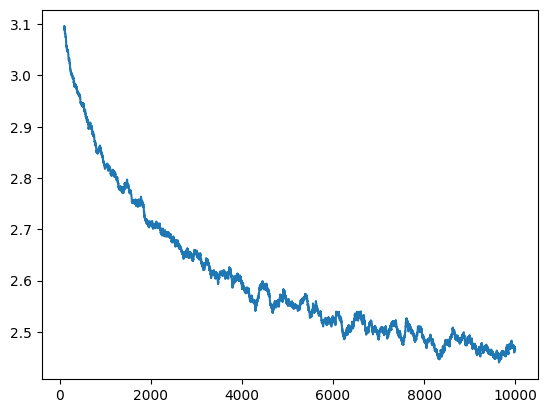

In [ ]:
pd.Series(losses).ewm(100).mean()[100:].plot();

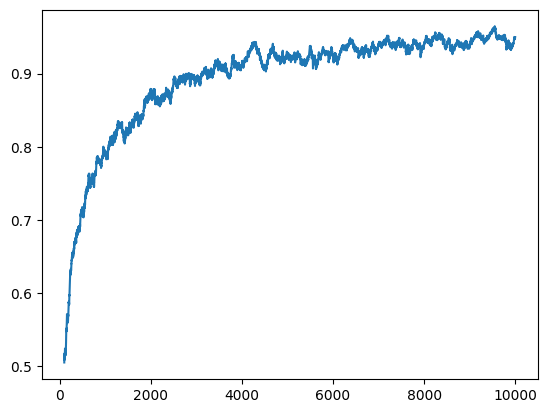

In [ ]:
pd.Series(accuracies).ewm(100).mean()[100:].plot();

In [ ]:
NEW_MODEL_NAME = '/content/drive/MyDrive/nivkh_v1'
model.save_pretrained(NEW_MODEL_NAME)
tokenizer.save_pretrained(NEW_MODEL_NAME)

('/content/drive/MyDrive/nivkh_v1/tokenizer_config.json',
 '/content/drive/MyDrive/nivkh_v1/special_tokens_map.json',
 '/content/drive/MyDrive/nivkh_v1/vocab.txt',
 '/content/drive/MyDrive/nivkh_v1/added_tokens.json',
 '/content/drive/MyDrive/nivkh_v1/tokenizer.json')